### Importações gerais

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, color
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
from skimage import data, filters
from ipywidgets import widgets
from scipy.ndimage import convolve
from skimage import exposure
from skimage.filters import threshold_mean


%matplotlib inline

# Funcao para plotar uma imagem qualquer
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()
    
def normaliza(img):
    p2, p98 = np.percentile(ptt, (2, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    return img_rescale

def binariza(img):
    thresh = threshold_mean(out)
    binary = out > thresh
    show(binary)


# Realizando Convoluções

Nesse exemplo, criamos máscaras com o numpy para realização de convoluções diversas.

## Exemplo 1 - Convolução simples

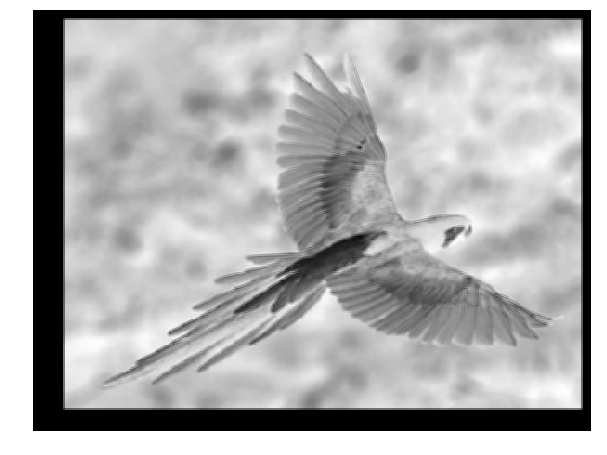

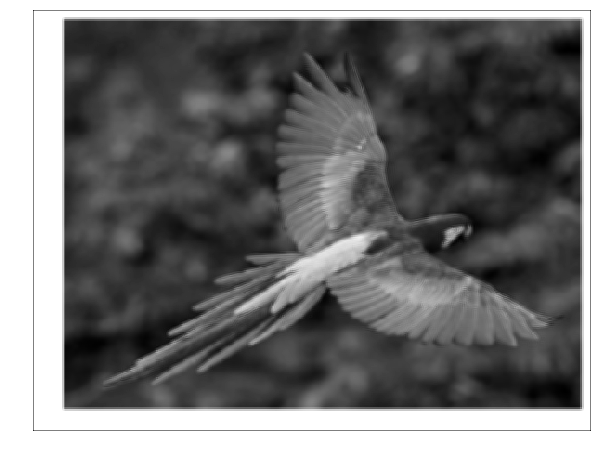

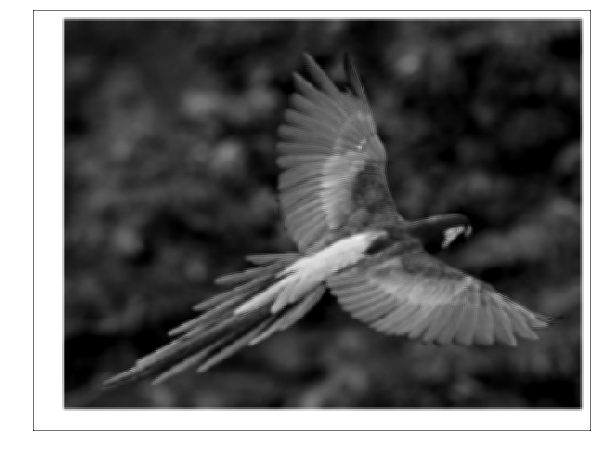

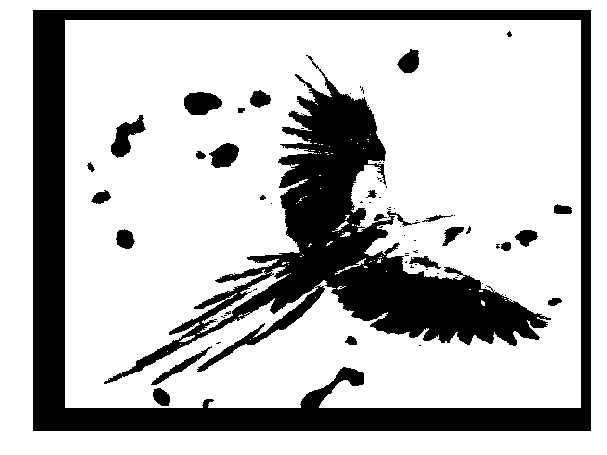

In [37]:
from scipy import ndimage


# kernel3x3 = np.array([[2,2,2],
#                      [2,-1,2],
#                      [2,2,2]])

# kernel3x3 = np.array([[-1,-1,-1],
#                      [-1,2,-1],
#                      [-1,-1,-1]])

# kernel3x3 = np.array([[-1,-1,2],
#                       [-1,2,-1],
#                       [2,-1,-1]])

# kernel5x5 = np.array([[2, 0, -1, 0, -2],
#                   [0, 0, 0, 0, 0],
#                   [1, 0, 1, 0, -1],
#                   [0, 0, 0, 0, 0],
#                   [2, 0, 1, 0, -2]])

# kernel5x5 = np.array([[0, 0, -1, 0, 0],
#                    [0, -1, -2, -1, 0],
#                    [-1, -2, 17, -2, -1],
#                    [0, -1, -2, -1, 0],
#                    [0, 0, -1, 0, 0]])

kernel5x5 = np.array([[17, 17, -17, 17, 17],
                   [17, -17, -17, -17, 17],
                   [-17, -17, 0, -17, -17],
                   [17, -17, -17, -17, 17],
                   [17, 17, -17, 17, 17]])

image = skimage.img_as_float(io.imread("arara.png"))
#show(image)

image = color.rgb2gray(image)       # Convert the image to grayscale (1 channel)
#show(image)

#mode indica como as bordas da imagem são tratadas
# mode : {‘reflect’,’constant’,’nearest’,’mirror’, ‘wrap’}, optional

out = ndimage.convolve(image, kernel3x3, mode='mirror')
show(out)


# out = ndimage.convolve(image, kernel5x5, mode='constant', cval=0.0)
# show(out)


ptt = ndimage.convolve(out, kernel3x3, mode='constant', cval=0.0)
show(ptt)
ptt = normaliza(ptt)
show(ptt)
binariza(ptt)


## Exercício

Crie três máscaras convolutionais aleatórias com dimensões diversas (entre 3 e 7). Dada uma imagem de entrada, seu programa deve aplicar uma convolução com cada filtro gerado em sequência. Não se esqueça de aplicar algum tipo de normalização entre as operações de convolução.

Responda as seguintes perguntas:

1) Como ficaram as imagens resultantes dos processos de operação? Por quê?

2) O que acontece se equalizarmos as imagens ao invés de aplicarmos normalização entre as convoluções?
